In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [4]:
dir_current = Path.cwd()
dir_data = dir_current / "pokemon_data.xlsx"
df = pd.read_excel(dir_data)
df.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [5]:
df = df.drop(columns=["#","Type 2"])

In [36]:
# create df1 a copy of df with only Attack and Defense
df1 = df[["Type 1","HP","Attack", "Defense","Sp. Atk",	"Sp. Def",	"Speed","Generation","Legendary"]].copy()
df1["Legendary"] = [0 if g == "False" else 1 for g in df1["Legendary"]]
df1.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,45,49,49,65,65,45,1,1
1,Grass,60,62,63,80,80,60,1,1
2,Grass,80,82,83,100,100,80,1,1
3,Grass,80,100,123,122,120,80,1,1
4,Fire,39,52,43,60,50,65,1,1


In [45]:
np.sum(df1.loc[5, ["Attack","Defense"]].values)


122

In [48]:
df1["Totals"] = [(lambda x: np.sum(x.loc[i,["HP","Attack", "Defense","Sp. Atk",	"Sp. Def",	"Speed"]].values))(df1) for i in df1.index]
df1.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totals
0,Grass,45,49,49,65,65,45,1,1,318
1,Grass,60,62,63,80,80,60,1,1,405
2,Grass,80,82,83,100,100,80,1,1,525
3,Grass,80,100,123,122,120,80,1,1,625
4,Fire,39,52,43,60,50,65,1,1,309


In [58]:
df1["Total"] = df1.loc[:,["HP","Attack", "Defense","Sp. Atk",	"Sp. Def",	"Speed"]].corrwith(df1["Generation"])
df1.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totals,Total
0,Grass,45,49,49,65,65,45,1,1,318,NaN
1,Grass,60,62,63,80,80,60,1,1,405,NaN
2,Grass,80,82,83,100,100,80,1,1,525,NaN
3,Grass,80,100,123,122,120,80,1,1,625,NaN
4,Fire,39,52,43,60,50,65,1,1,309,NaN


In [54]:
df1[["Totals","Legendary"]].sort_values

<bound method DataFrame.sort_values of      Totals  Legendary
0       318          1
1       405          1
2       525          1
3       625          1
4       309          1
..      ...        ...
795     600          1
796     700          1
797     600          1
798     680          1
799     600          1

[800 rows x 2 columns]>

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:89: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:90: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


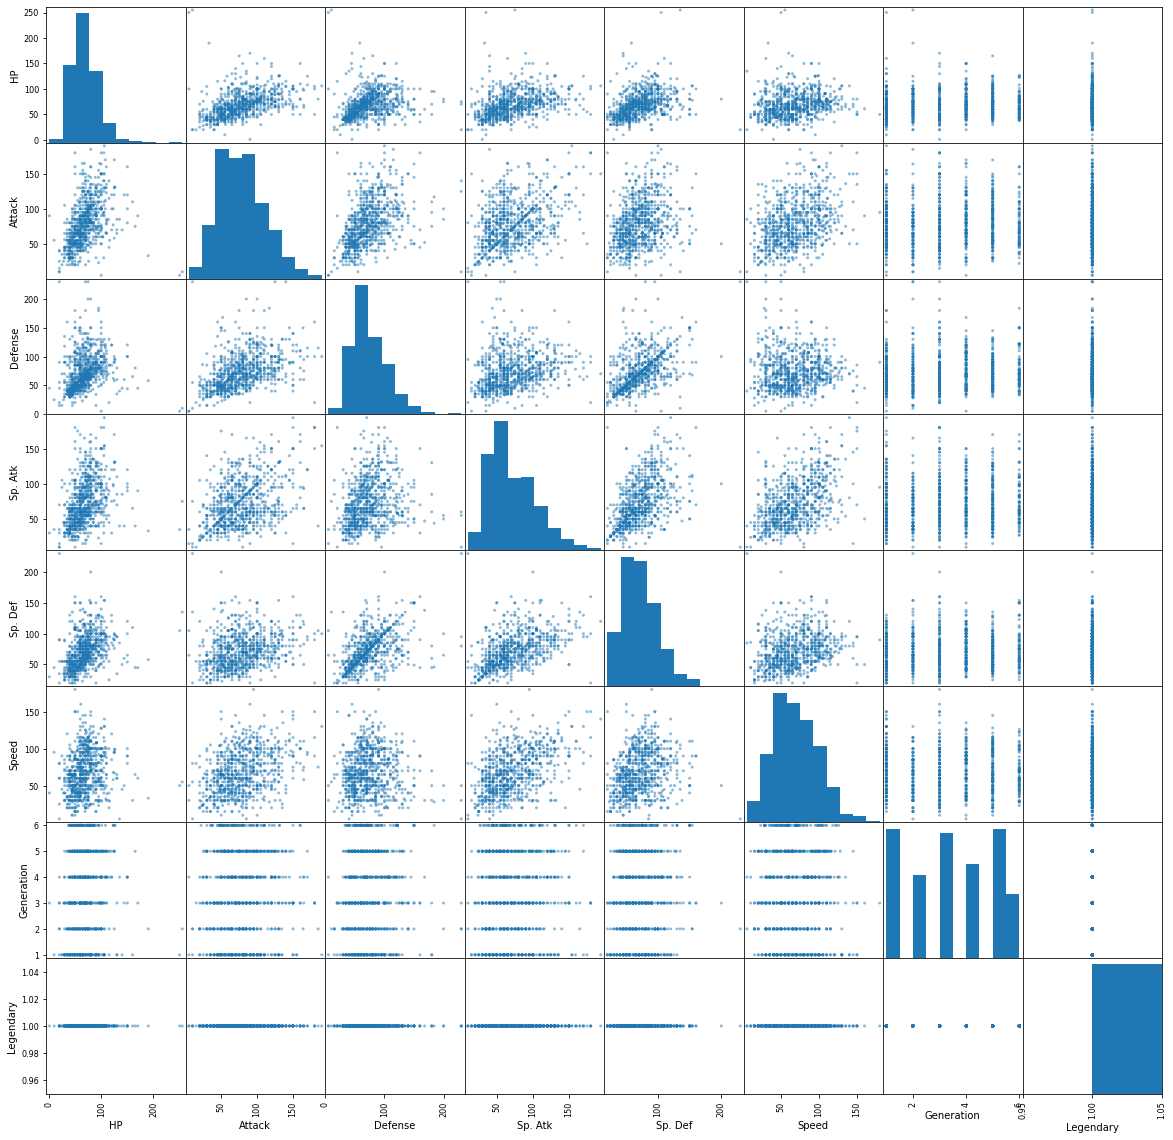

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1, figsize=(20,20))
plt.show()

In [79]:
type(df1["Type 1"].values.astype("str")[0])

numpy.str_

In [96]:
df1.loc[(df1["Type 1"].str.contains("P")) & (~df1["Type 1"].str.contains("o")) & (df1["Totals"] > 300)][["Type 1","Totals"]]



,Type 1,Totals
68,Psychic,310
69,Psychic,400
70,Psychic,500
71,Psychic,590
104,Psychic,328
105,Psychic,483
131,Psychic,460
162,Psychic,680
163,Psychic,780
164,Psychic,780


### Groupby

In [99]:
df1.head()

,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totals,Total
0,Grass,45,49,49,65,65,45,1,1,318,NaN
1,Grass,60,62,63,80,80,60,1,1,405,NaN
2,Grass,80,82,83,100,100,80,1,1,525,NaN
3,Grass,80,100,123,122,120,80,1,1,625,NaN
4,Fire,39,52,43,60,50,65,1,1,309,NaN


In [123]:
df1.groupby("Type 1").mean().sort_values("Attack", ascending=0)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Totals,Total
Type 1,,,,,,,,,,
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,1.0,550.531250,NaN
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,1.0,416.444444,NaN
Ground,73.781250,95.750000,84.843750,56.468750,62.750000,63.906250,3.156250,1.0,437.500000,NaN
Rock,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,1.0,453.750000,NaN
Steel,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,1.0,487.703704,NaN
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,1.0,445.741935,NaN
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,1.0,458.076923,NaN
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,1.0,485.000000,NaN
Poison,67.250000,74.678571,68.821429,60.428571,64.392857,63.571429,2.535714,1.0,399.142857,NaN
